<a href="https://colab.research.google.com/github/Rolikumari985/Support-Vector-Machines-SVM-/blob/main/Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer[1].csv to breast-cancer[1].csv


Load and Prepare Dataset

Hyperparameter Tuning (C and gamma)

In [6]:
from sklearn.model_selection import GridSearchCV

# RBF SVM tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale']
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_nonlin, y_train_nonlin)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 'scale'}
Best score: 0.9380952380952381


Cross-Validation Evaluation

In [7]:
from sklearn.model_selection import cross_val_score

# Evaluate linear SVM
scores_lin = cross_val_score(svm_linear, X_lin, y_lin, cv=5)
print("Linear SVM CV accuracy:", scores_lin.mean())

# Evaluate best RBF SVM
best_svm_rbf = grid.best_estimator_
scores_rbf = cross_val_score(best_svm_rbf, X_nonlin, y_nonlin, cv=5)
print("RBF SVM CV accuracy:", scores_rbf.mean())


Linear SVM CV accuracy: 0.9166666666666667
RBF SVM CV accuracy: 0.9666666666666666


In [3]:
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# For linear classification
X_lin, y_lin = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# For non-linear classification
X_nonlin, y_nonlin = make_moons(n_samples=300, noise=0.2, random_state=42)

# Train-test split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.3, random_state=42)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(X_nonlin, y_nonlin, test_size=0.3, random_state=42)


 Train SVM with Linear and RBF Kernel

In [4]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_lin, y_train_lin)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_nonlin, y_train_nonlin)


SVC()

Visualize Decision Boundaries

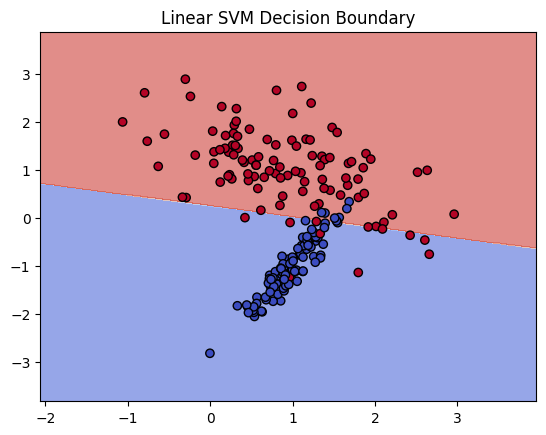

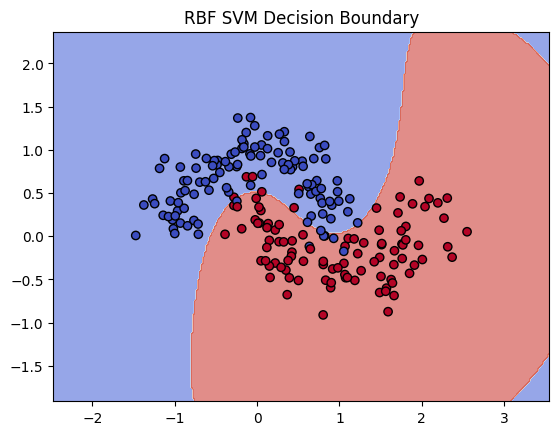

In [5]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

# Plot
plot_decision_boundary(svm_linear, X_train_lin, y_train_lin, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_train_nonlin, y_train_nonlin, "RBF SVM Decision Boundary")
